**BSP 2024-2025/1**

**Total of 15 marks**

**Names/Neptun Codes:**

**Marks attained for this part of the homework will count towards your final grade.**

**To attain (full) marks for a question, any answer that includes images or a piece of knowledge, which should be referenced/cited, needs to highlight the source (book, article or web address). You are encouraged to help each other, but identical solutions will not be graded.**

**Write your codes to this document for the full marks. Rename the document to: BSP_REP07_NEPTUNCODES_FULL_NAMES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pyPCG, pyPCG.io, pyPCG.segment, pyPCG.preprocessing
import pyPCG.features, pyPCG.stats

## Task - The PCG recording (1 point)
The signal a0191m was downloaded from the 2016 [Physionet Challenge database](https://archive.physionet.org/challenge/2016/), for the classification of normal-abnormal PCG recordings.

Plot the PCG signal and its spectrum.

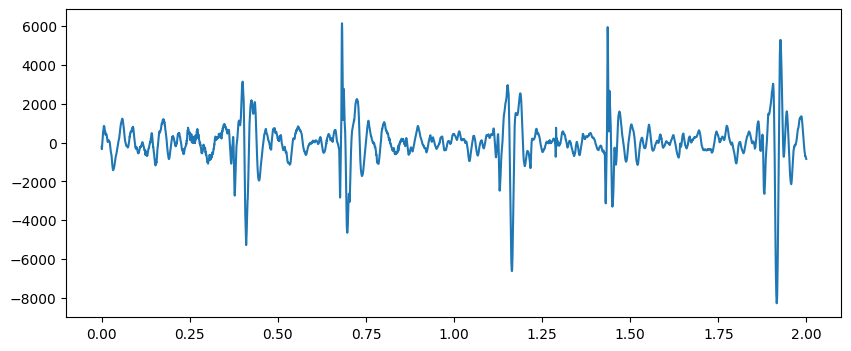

In [4]:
time_limit=4000
sampling_frequency, values = wavfile.read('a0191.wav')
time = np.linspace(0, len(values) / sampling_frequency, num=len(values))

plt.figure(figsize=(10, 4))
plt.plot(time[0:time_limit], values[0:time_limit])

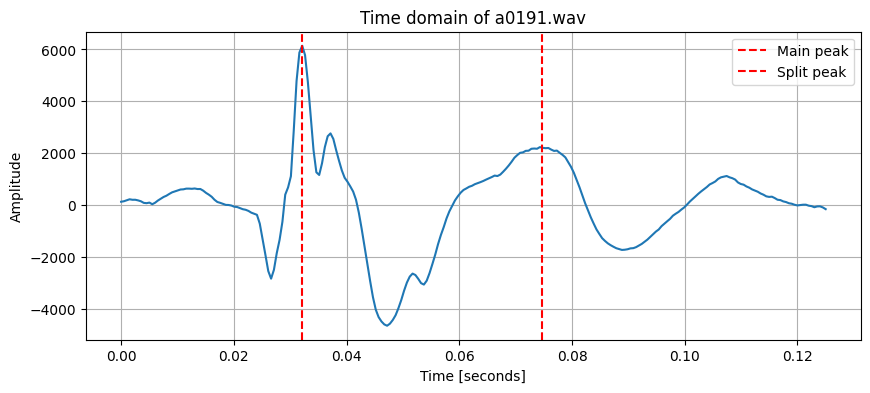

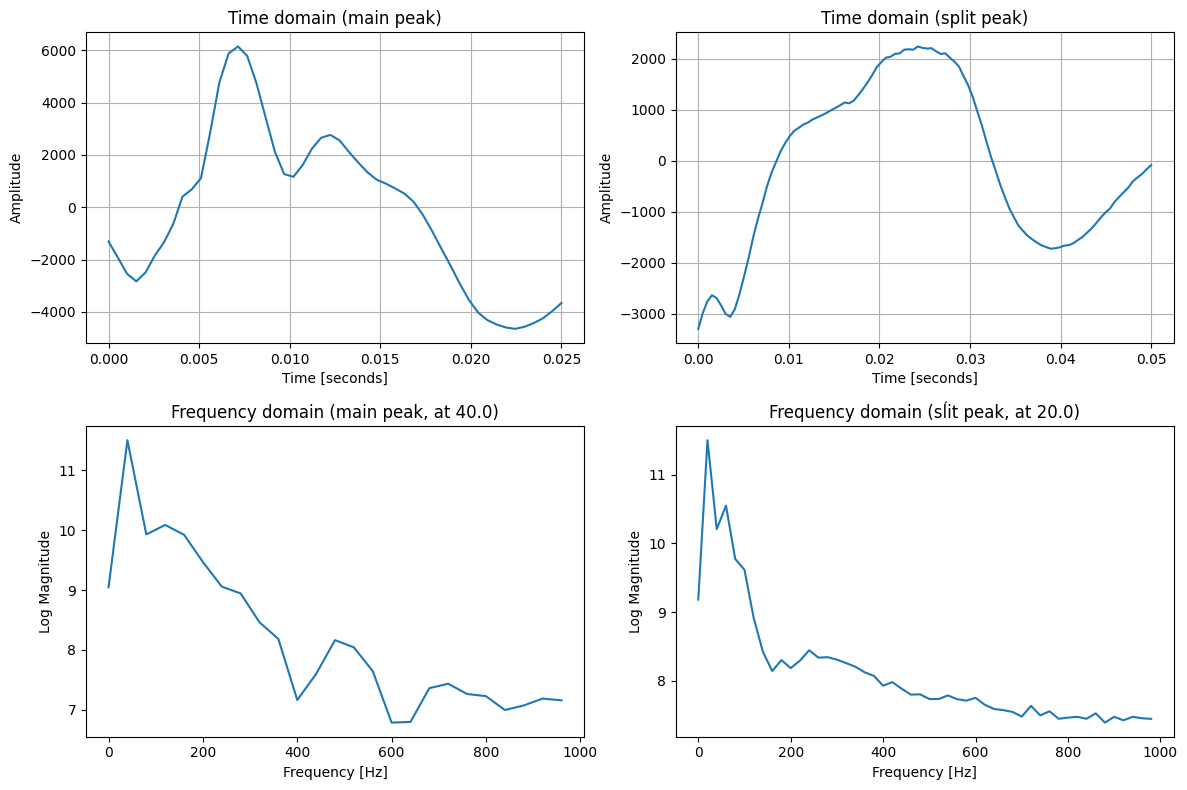

In [26]:
values_short = values[1300:1550]
time = np.linspace(0, len(values_short) / sampling_frequency, num=len(values_short))
peak_1 = time[values_short.argmax()]  # in seconds
peak_2 = peak_1 + 0.0426

plt.figure(figsize=(10, 4))
plt.plot(time, values_short)
plt.title('Time domain of a0191.wav')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.axvline(x=peak_1, color='red', linestyle='--', label='Main peak')
plt.axvline(x=peak_2, color='red', linestyle='--', label='Split peak')
plt.legend()
plt.show()

values_slice_1 = values[1350 : 1400]
values_slice_2 = values[1400 : 1500]
time_slice_1 = np.linspace(0, len(values_slice_1) / sampling_frequency, num=len(values_slice_1))
time_slice_2 = np.linspace(0, len(values_slice_2) / sampling_frequency, num=len(values_slice_2))

fft_values_1 = np.abs(np.fft.fft(values_slice_1))
fft_values_2 = np.abs(np.fft.fft(values_slice_2))
fft_frequencies_1 = np.fft.fftfreq(len(values_slice_1), d=1/sampling_frequency)
fft_frequencies_2 = np.fft.fftfreq(len(values_slice_2), d=1/sampling_frequency)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time_slice_1, values_slice_1)
plt.title('Time domain (main peak)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(time_slice_2, values_slice_2)
plt.title('Time domain (split peak)')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(fft_frequencies_1[:len(values_slice_1)//2], np.log(fft_values_1[:len(values_slice_1)//2]))
plt.title(f'Frequency domain (main peak, at {fft_frequencies_1[np.argmax(fft_values_1[:len(values_slice_1)//2])]})')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Magnitude')

plt.subplot(2, 2, 4)
plt.plot(fft_frequencies_2[:len(values_slice_2)//2], np.log(fft_values_2[:len(values_slice_2)//2]))
plt.title(f'Frequency domain (sĺit peak, at {fft_frequencies_2[np.argmax(fft_values_2[:len(values_slice_2)//2])]})')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Magnitude')

plt.tight_layout()
plt.show()

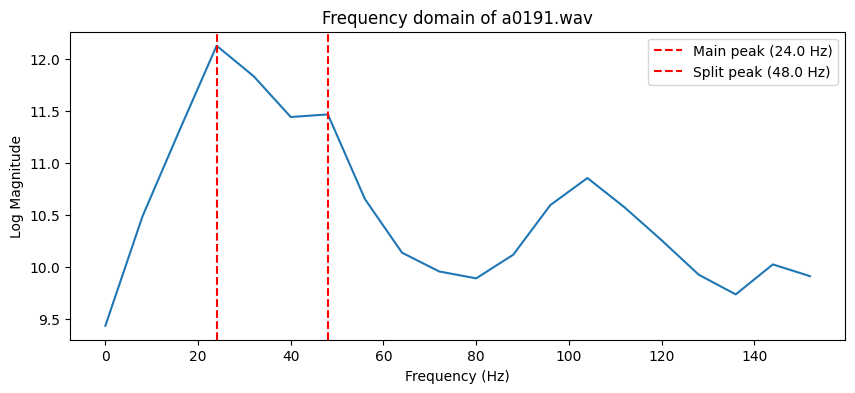

In [ ]:
freq_limit=20
n = len(values_short)
fft_values = np.abs(np.fft.fft(values_short))
fft_frequencies = np.fft.fftfreq(n, d=1/sampling_frequency)
peak_1 = fft_frequencies[fft_values.argmax()]  # Hz
peak_2 = peak_1 + 24


plt.figure(figsize=(10, 4))
plt.plot(fft_frequencies[:n//2][:freq_limit], np.log(fft_values[:n//2])[:freq_limit])
plt.title('Frequency domain of a0191.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Log Magnitude')

plt.axvline(x=peak_1, color='red', linestyle='--', label=f'Split peak ({peak_1} Hz)')
plt.axvline(x=peak_2, color='red', linestyle='--', label=f'Main peak ({peak_2} Hz)')
plt.legend()

## Task 2 - The abnormality (1 point)
*“The sound S2 is caused by the closure of the aortic and pulmonary valves. In some cases, both physiological and pathological, a split S2 is heard. With the split S2, the closure of the two valves does not occur together. Physiological S2 splitting in which the closing of the aortic valve precedes the closing of the pulmonic is normal. … Exaggerated splitting of the sound S2 may occur in right ventricular outflow tract obstruction (for example: pulmonary stenosis) and right bundle branch block (RBBB). … The wide split has a duration of about 50 ms compared to the normal split with the value .The measurement of the split S2, lower or higher than 30 ms, will easily make it possible to make a discrimination between the normal or pathological type."* [source](https://www.sciencedirect.com/science/article/pii/S0010482506000199)

Show splitting events on the plotted PCG signal. Are they physiological or pathological? (Use the ECG signal if you are unsure about the distinction of S1 and S2.)

In [ ]:
# Already plotted in the graphs above

## Task 3 - STFT (3 point)
Implement your version of the STFT function. It should have the following format:
function ***my_stft(signal,fs,windowtype,windowlength)***

short time fourier transform
**inputs**:
    - *signal*:     the ignal to take the transform of, 1D array
    - *fs*:         the sampling frequency of the signal
    - *windowtype*: 0 for rectangular, 1 for hann window
    - *widowsize*:  length of window in samples
**output**:
    - subplots of the signal and a 'one-sided' STFT spectrogram, with proper time and frequency axes


Example run with ***my_stft(PCG,fs,0,100)***

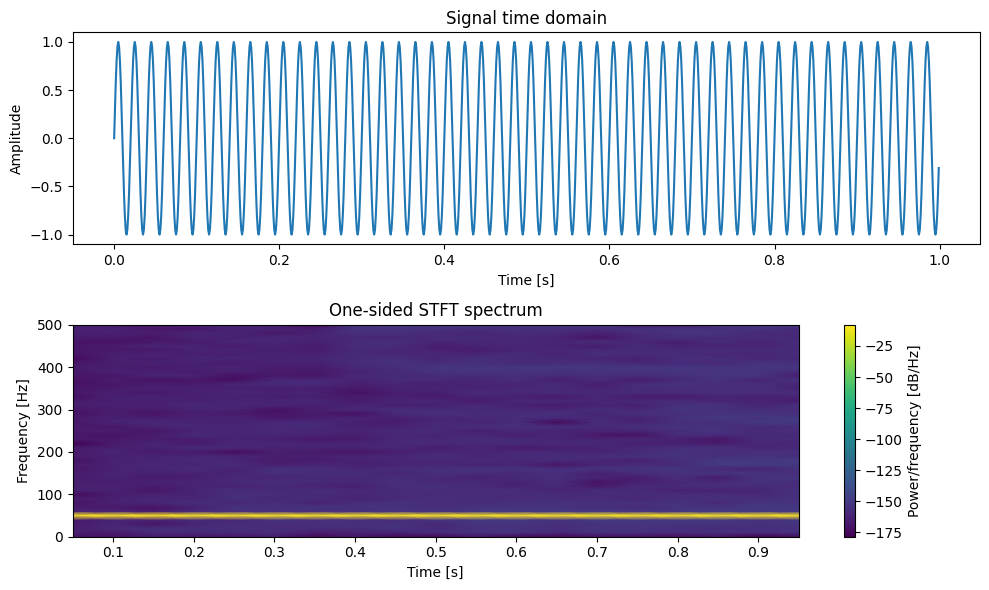

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window, spectrogram

def my_stft(signal, fs, windowtype, windowlength):
    if windowtype == 0:
        window = np.ones(windowlength)
    elif windowtype == 1:
        window = get_window('hann', windowlength)

    f, t, Sxx = spectrogram(signal, fs, window=window, nperseg=windowlength, noverlap=windowlength//2, mode='magnitude')

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(signal)) / fs, signal)
    plt.title('Signal time domain')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title('One-sided STFT spectrum')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.colorbar(label='Power/frequency [dB/Hz]')

    plt.tight_layout()
    plt.show()

fs = 1000
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t)

my_stft(signal, fs, 0, 100)


## Task 4 - TF-uncertainty (2 point)
Explain and illustrate the time-frequency uncertainty with the help of your code and signal. When are the splits visible/localizable? How does the window-type influence this difference?

<ipython-input-16-94c6ef4ec942>:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')


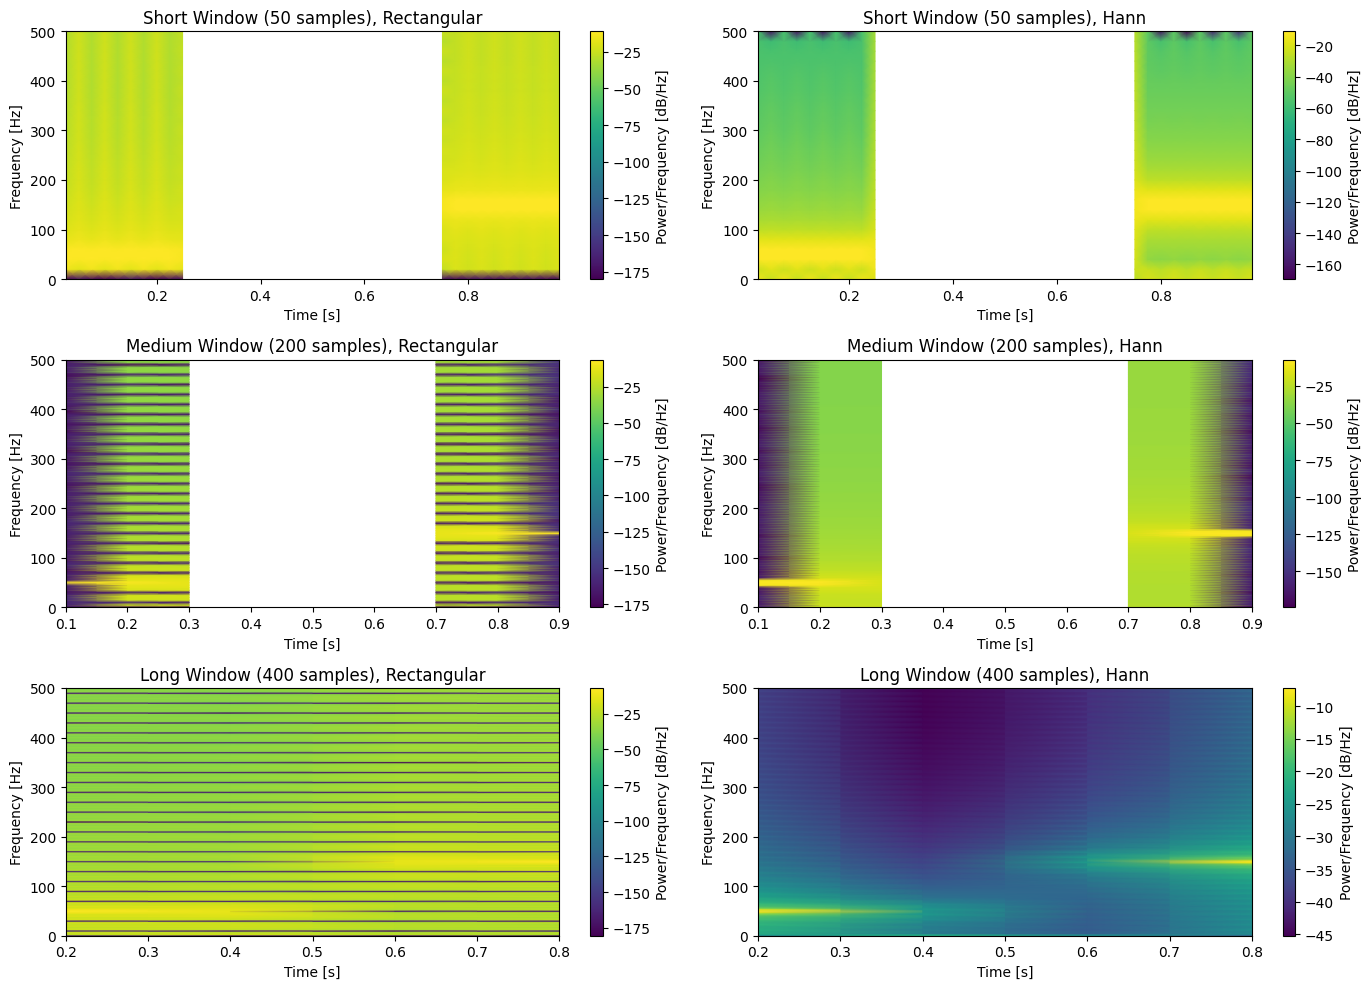

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window, spectrogram

def my_stft(signal, fs, windowtype, windowlength):
    if windowtype == 0:
        window = np.ones(windowlength)
    elif windowtype == 1:
        window = get_window('hann', windowlength)

    f, t, Sxx = spectrogram(signal, fs, window=window, nperseg=windowlength, noverlap=windowlength//2, mode='magnitude')

    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.colorbar(label='Power/Frequency [dB/Hz]')

fs = 1000
t = np.linspace(0, 2, 2 * fs, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t[:fs//4])
signal = np.concatenate([signal, np.zeros(fs//2)])
signal = np.concatenate([signal, np.sin(2 * np.pi * 150 * t[:fs//4])])

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
my_stft(signal, fs, 0, 50)
plt.title('Short Window (50 samples), Rectangular')

plt.subplot(3, 2, 2)
my_stft(signal, fs, 1, 50)
plt.title('Short Window (50 samples), Hann')

plt.subplot(3, 2, 3)
my_stft(signal, fs, 0, 200)
plt.title('Medium Window (200 samples), Rectangular')

plt.subplot(3, 2, 4)
my_stft(signal, fs, 1, 200)
plt.title('Medium Window (200 samples), Hann')

plt.subplot(3, 2, 5)
my_stft(signal, fs, 0, 400)
plt.title('Long Window (400 samples), Rectangular')

plt.subplot(3, 2, 6)
my_stft(signal, fs, 1, 400)
plt.title('Long Window (400 samples), Hann')

plt.tight_layout()
plt.show()


## Task 5 - CWT vs STFT in theory (1 point)
Explain in your own words, how is the STFT different from the CWT.

The STFT (Short-Time Fourier Transform) and CWT (Continuous Wavelet Transform) are both methods for time-frequency analysis of signals, but they approach the problem in different ways.

STFT divides the signal into fixed-length windows and applies Fourier transform on each window. This gives us frequency information for each time window, but because the window size is fixed, it’s difficult to obtain both precise time and frequency details simultaneously. High-frequency components require smaller windows, and low-frequency components require larger ones, making it a trade-off between time and frequency resolution.

CWT, on the other hand, uses a continuously scaling window, allowing the analysis to be performed at different frequencies (scales). This method can provide a more flexible and detailed representation of the signal, especially for non-stationary signals, since it adapts to the signal's structure. It offers better resolution in both time and frequency, particularly for signals with varying frequencies over time.

## Task 6 - CWT in practice (1 point)
Use the cwt() function of PyWavelets to obtain the continuous wavelet transform of the PCG signal, and plot it. How is CWT discretized in Python? Which method would you recommend for detecting the split?

In [3]:
mat_data = loadmat('a0191m.mat')
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'val'])


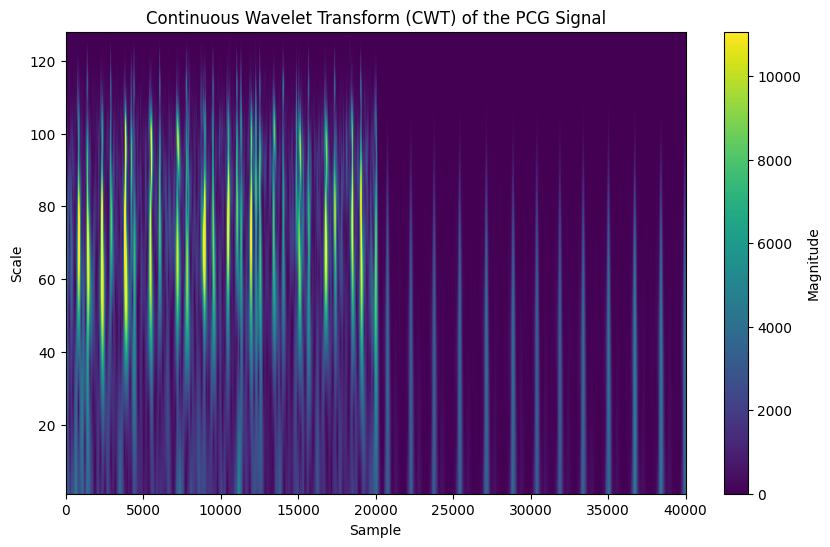

In [5]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pywt
import numpy as np

data = sio.loadmat('a0191m.mat')
pcg_signal = data['val'].flatten()

scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(pcg_signal, scales, 'morl')

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, len(pcg_signal), 1, 128], cmap='viridis', aspect='auto',
           vmax=np.percentile(np.abs(coefficients), 99))
plt.colorbar(label='Magnitude')
plt.ylabel("Scale")
plt.xlabel("Sample")
plt.title("Continuous Wavelet Transform (CWT) of the PCG Signal")
plt.show()


## Task 7 - pyPCG (5 point)

- Install pyPCG, read in the data and visualize it. Why is the sample rate so low?
- Show the spectrogram of a heart cycle from each example file. How does this relate to S1 split?
- Improve the example code with preprocessing or other methods. Give a reason for their inclusion.
- Calculate new features not shown in the example.
- Run your methods on the "non-example" files. Try to classify them.
- (Do not use the heart sound label file. Try to implement a peak detection method - extra point)

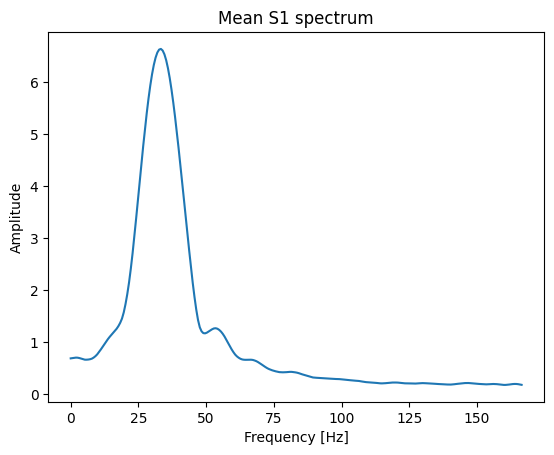

In [29]:
file = "example_2"
signal = pyPCG.pcg_signal(*pyPCG.io.read_signal_file(f"{file}.wav","wav"))
labels = pyPCG.io.read_hsannot_file(f"{file}.csv")
#pyPCG.plot(signal,xlim=(0,4))

signal = pyPCG.normalize(signal)
s1_label = np.array(labels[0])
s2_label = np.array(labels[1])
envelope = pyPCG.preprocessing.envelope(signal)
s1 = np.round(s1_label*signal.fs).astype(int)
starts, ends = pyPCG.segment.segment_peaks(s1,envelope)
spectra = pyPCG.features.spectrum_raw(starts,ends,signal)
mean_spectrum = np.mean(spectra,axis=0)
freqs = np.linspace(0,signal.fs/2,256)

plt.figure()
plt.plot(freqs,mean_spectrum)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Mean S1 spectrum")
plt.show()

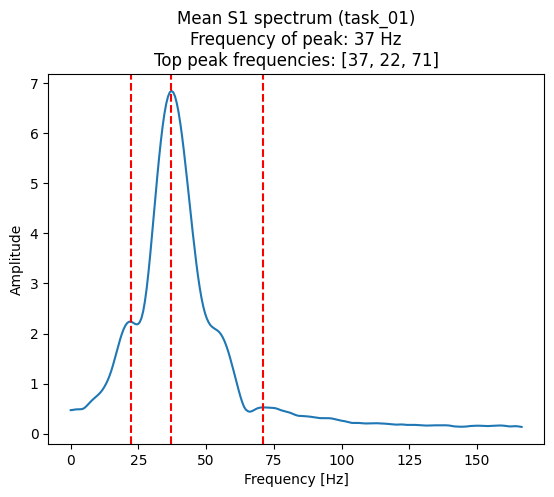

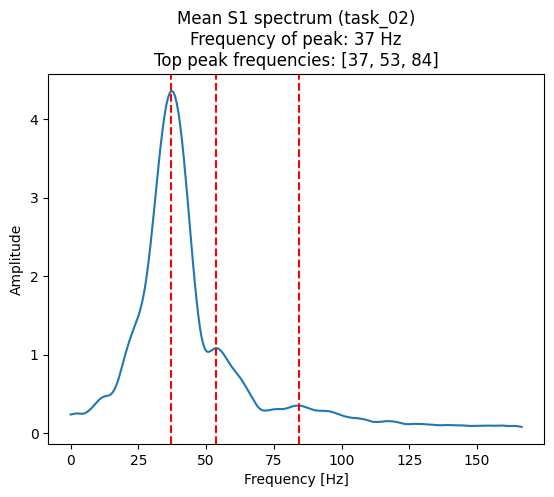

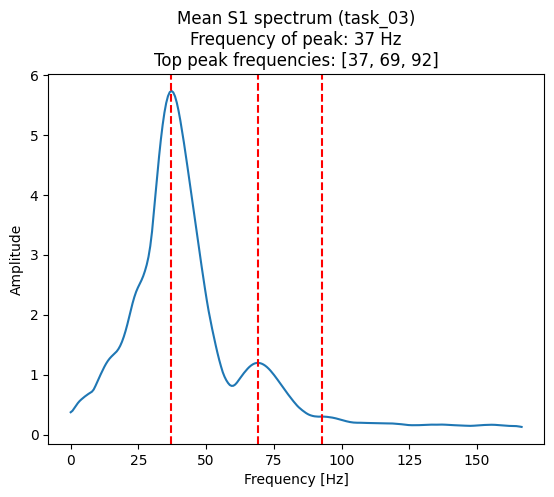

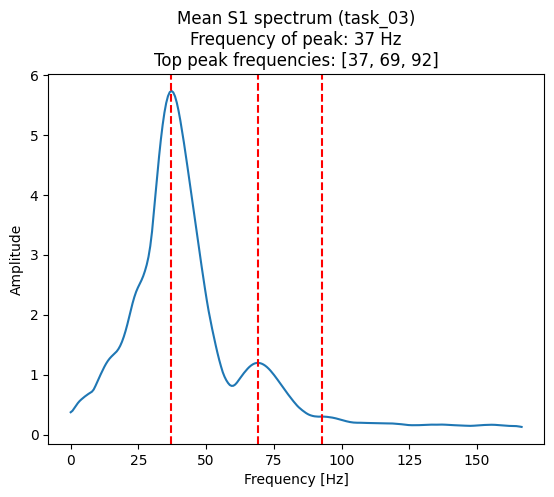

In [ ]:
from scipy.signal import find_peaks

# The first one is splti, the others are not
# The feature "top 3 peaks" to classify them
# We can see that the split-peak signal is the only one were the first peak have a higher frequency than the second peak

for file in ["task_01", "task_02", "task_03", "task_03"]:
    signal = pyPCG.pcg_signal(*pyPCG.io.read_signal_file(f"{file}.wav","wav"))
    labels = pyPCG.io.read_hsannot_file(f"{file}.csv")
    #pyPCG.plot(signal,xlim=(0,4))

    signal = pyPCG.normalize(signal)
    s1_label = np.array(labels[0])
    s2_label = np.array(labels[1])
    envelope = pyPCG.preprocessing.envelope(signal)
    s1 = np.round(s1_label*signal.fs).astype(int)
    starts, ends = pyPCG.segment.segment_peaks(s1,envelope)
    spectra = pyPCG.features.spectrum_raw(starts,ends,signal)
    mean_spectrum = np.mean(spectra,axis=0)
    freqs = np.linspace(0,signal.fs/2,256)

    peaks, _ = find_peaks(mean_spectrum, distance=10)
    top_peaks = peaks[np.argsort(mean_spectrum[peaks])[-3:]][::-1]
    top_frequencies = [int(f) for f in freqs[top_peaks]]

    plt.figure()
    plt.plot(freqs,mean_spectrum)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    plt.title(f"Mean S1 spectrum ({file})\nFrequency of peak: {int(freqs[mean_spectrum.argmax()])} Hz\nTop peak frequencies: {top_frequencies}")
    for peak in top_peaks:
        plt.axvline(x=freqs[peak], color='red', linestyle='--')
    plt.show()